In [1]:
import pyTigerGraph as tg

conn = tg.TigerGraphConnection("http://3.144.132.94", graphname="KDD_2022_NFT")

In [2]:
featurizer = conn.gds.featurizer()

In [3]:
featurizer.listAlgorithms("Centrality")

Available algorithms for category Centrality in the GDS (https://github.com/tigergraph/gsql-graph-algorithms):
pagerank: 
 global: 
  weighted: 
   Algorithm Name: tg_pagerank_wt
   Algorithm Link: https://github.com/tigergraph/gsql-graph-algorithms/blob/master/algorithms/Centrality/pagerank/global/weighted/tg_pagerank_wt.gsql. 
  unweighted: 
   Algorithm Name: tg_pagerank
   Algorithm Link: https://github.com/tigergraph/gsql-graph-algorithms/blob/master/algorithms/Centrality/pagerank/global/unweighted/tg_pagerank.gsql. 
article_rank: 
 Algorithm Name: tg_article_rank
 Algorithm Link: https://github.com/tigergraph/gsql-graph-algorithms/blob/master/algorithms/Centrality/article_rank/tg_article_rank.gsql. 
Betweenness: 
 Algorithm Name: tg_betweenness_cent
 Algorithm Link: https://github.com/tigergraph/gsql-graph-algorithms/blob/master/algorithms/Centrality/betweenness/tg_betweenness_cent.gsql. 
closeness: 
 approximate: 
  Algorithm Name: tg_closeness_cent_approx
  Algorithm Link: http

In [4]:
featurizer.installAlgorithm("tg_pagerank")

'tg_pagerank'

In [5]:
params={"v_type": "NFT_User", "e_type": "USER_SOLD_TO", 'result_attr': 'pagerank'}

In [6]:
featurizer.runAlgorithm("tg_pagerank", params=params, feat_name="pagerank", schema_name=["NFT_User"], global_schema=False)

[{'@@top_scores_heap': [{'Vertex_ID': 'contractwork', 'score': 522.12415},
   {'Vertex_ID': 'e2vai.waa', 'score': 476.01984},
   {'Vertex_ID': 'cneba.wam', 'score': 330.54477},
   {'Vertex_ID': '2okbc.wam', 'score': 260.81992},
   {'Vertex_ID': 'ey4b.wam', 'score': 255.23291},
   {'Vertex_ID': 'yyxba.wam', 'score': 221.4155},
   {'Vertex_ID': 'qhurm.wam', 'score': 215.12881},
   {'Vertex_ID': 'cxybs.wam', 'score': 185.96808},
   {'Vertex_ID': 'rjwas.wam', 'score': 175.91425},
   {'Vertex_ID': 'cedr.wam', 'score': 172.96387},
   {'Vertex_ID': '0x9e6e344f94305d36ea59912b0911fe2c9149ed3e',
    'score': 167.18311},
   {'Vertex_ID': 'h3kba.wam', 'score': 162.36984},
   {'Vertex_ID': 'q3brk.wam', 'score': 130.11215},
   {'Vertex_ID': 'orcra.wam', 'score': 122.50283},
   {'Vertex_ID': 'rxfrk.wam', 'score': 116.91318},
   {'Vertex_ID': 'jocru.wam', 'score': 115.21035},
   {'Vertex_ID': 'wwvrm.wam', 'score': 109.82959},
   {'Vertex_ID': 'blopsie.za', 'score': 105.28922},
   {'Vertex_ID': 'noqaw

In [7]:
%%writefile ./average_selling_price.gsql

CREATE QUERY average_selling_price(BOOL print_accum = FALSE, STRING result_attr =  "") { 
  AvgAccum @average_selling_price;
  users = {NFT_User.*};
  res = SELECT u FROM users:u -(USER_SOLD_NFT)-> Transaction:tgt
        ACCUM u.@average_selling_price += tgt.usd_price;
  
  res = SELECT s FROM res:s
    POST-ACCUM
        IF result_attr != "" THEN 
            IF s.@average_selling_price == 0 THEN
              s.setAttr(result_attr, -1)
            ELSE
              s.setAttr(result_attr, s.@average_selling_price) 
            END
        END;
  IF print_accum THEN
    PRINT res;
  END;
}

Overwriting ./average_selling_price.gsql


In [8]:
featurizer.installAlgorithm("average_selling_price", query_path="./average_selling_price.gsql")

'average_selling_price'

In [134]:
params = {
    "result_attr": "avg_sell_price"
}

In [135]:
try:
    featurizer.runAlgorithm("average_selling_price", params=params, feat_name="avg_sell_price", feat_type="FLOAT", custom_query=True, schema_name=["NFT_User"])
except ConnectionError:
    featurizer.runAlgorithm("average_selling_price", params=params)

In [137]:
df = conn.getVertexDataFrame("NFT_User", where="avg_sell_price > 0", limit=100_000)
pr_sell = df[["pagerank", "avg_sell_price"]]

<AxesSubplot:xlabel='pagerank', ylabel='avg_sell_price'>

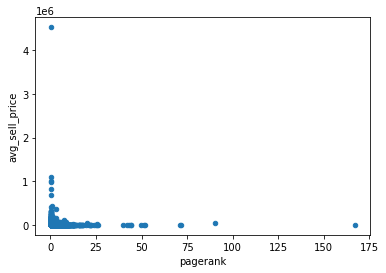

In [138]:
pr_sell.plot.scatter(x="pagerank", y="avg_sell_price")

### Remove Outliers

<AxesSubplot:xlabel='pagerank', ylabel='avg_sell_price'>

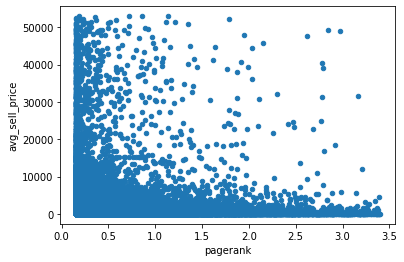

In [139]:
import numpy as np
from scipy import stats
pr_sell[(np.abs(stats.zscore(pr_sell)) < 3).all(axis=1)].plot.scatter(x="pagerank", y="avg_sell_price")

In [140]:
featurizer.listAlgorithms("Community")

Available algorithms for category Community in the GDS (https://github.com/tigergraph/gsql-graph-algorithms):
connected_components: 
 strongly_connected_components: 
  standard: 
   Algorithm Name: tg_scc
   Algorithm Link: https://github.com/tigergraph/gsql-graph-algorithms/blob/master/algorithms/Community/connected_components/strongly_connected_components/standard/tg_scc.gsql. 
k_core: 
 Algorithm Name: tg_kcore
 Algorithm Link: https://github.com/tigergraph/gsql-graph-algorithms/blob/master/algorithms/Community/k_core/tg_kcore.gsql. 
label_propagation: 
 Algorithm Name: tg_label_prop
 Algorithm Link: https://github.com/tigergraph/gsql-graph-algorithms/blob/master/algorithms/Community/label_propagation/tg_label_prop.gsql. 
local_clustering_coefficient: 
 Algorithm Name: tg_lcc
 Algorithm Link: https://github.com/tigergraph/gsql-graph-algorithms/blob/master/algorithms/Community/local_clustering_coefficient/tg_lcc.gsql. 
louvain: 
 Algorithm Name: tg_louvain
 Algorithm Link: https://gi

In [141]:
featurizer.installAlgorithm("tg_kcore")

'tg_kcore'

In [142]:
params = {
    "v_type": "NFT_User",
    "e_type": "USER_SOLD_TO",
    "print_accum": False,
    "result_attr": "k_core"
}
try:
    featurizer.runAlgorithm("tg_kcore", params = params, feat_name="k_core")
except ConnectionError:
    featurizer.runAlgorithm("tg_kcore", params = params)

In [147]:
df = conn.getVertexDataFrame("NFT_User", where="avg_sell_price > 0", limit=100_000)
df.head()

,v_id,nft_user_id,username,embedding,features,pagerank,fastrp_embedding,avg_sell_price,scc_id,k_core
0,0x7a4c98b60a0632ac4844883a7362df1b0d8308f3,0x7a4c98b60a0632ac4844883a7362df1b0d8308f3,,[],[],0.49227,[],54.25278,547356672,1
1,0xb3051509eeda06b2ef37ea2727ce5cf6b0f93883,0xb3051509eeda06b2ef37ea2727ce5cf6b0f93883,ZED_RUN,[],[],0.26563,[],706.51935,547356672,22
2,0xd4aa1ebc9b66e4f12a2ac73b355156c68fb79434,0xd4aa1ebc9b66e4f12a2ac73b355156c68fb79434,,[],[],0.34186,[],111.22664,547356672,13
3,0xdfc68d8f3d67e37413712b7fda2d609fd93edeac,0xdfc68d8f3d67e37413712b7fda2d609fd93edeac,,[],[],0.32479,[],71.35841,547356672,7
4,0xfbb589251a5dcd955f51fc36e560b18fa8a5e974,0xfbb589251a5dcd955f51fc36e560b18fa8a5e974,,[],[],4.72048,[],39.22706,547356672,12


In [157]:
df["k_core"].value_counts()

1       38254
2       16136
3       10107
4        6454
5        4480
        ...  
413         1
1264        1
569         1
559         1
738         1
Name: k_core, Length: 539, dtype: int64

In [149]:
len(df["k_core"].unique())

539

In [150]:
kcore_pr_sell = df[["pagerank", "avg_sell_price", "k_core"]]

kcore_pr_sell.groupby(["k_core"]).mean()

,pagerank,avg_sell_price
k_core,,
1,0.240588,1608.907341
2,0.330959,1475.020318
3,0.302641,964.332694
4,0.304382,822.554196
5,0.322563,814.372912
...,...,...
3244,3.840380,44.926930
3920,17.568690,785.849120
6715,0.281110,11.128610


In [158]:
size_of_core = df["k_core"].value_counts()

In [163]:
kcore_pr_sell["size_of_core"] = kcore_pr_sell["k_core"].apply(lambda x: size_of_core[x])

/var/folders/6m/4_05ft595_77hxj48by2vf0c0000gp/T/ipykernel_34084/485414690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcore_pr_sell["size_of_core"] = kcore_pr_sell["k_core"].apply(lambda x: size_of_core[x])


In [164]:
kcore_pr_sell.head()

,pagerank,avg_sell_price,k_core,size_of_core
0,0.49227,54.25278,1,38254
1,0.26563,706.51935,22,285
2,0.34186,111.22664,13,820
3,0.32479,71.35841,7,2533
4,4.72048,39.22706,12,945


In [165]:
kcore_pr_sell[["avg_sell_price", "size_of_core"]].corr()

,avg_sell_price,size_of_core
avg_sell_price,1.000000,0.024475
size_of_core,0.024475,1.000000


<AxesSubplot:xlabel='size_of_core', ylabel='avg_sell_price'>

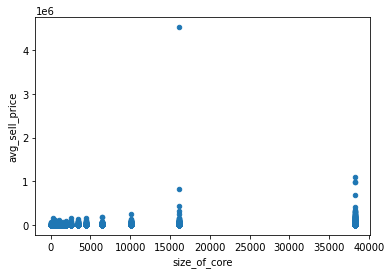

In [166]:
kcore_pr_sell.plot.scatter(x="size_of_core", y="avg_sell_price")

<AxesSubplot:xlabel='size_of_core', ylabel='avg_sell_price'>

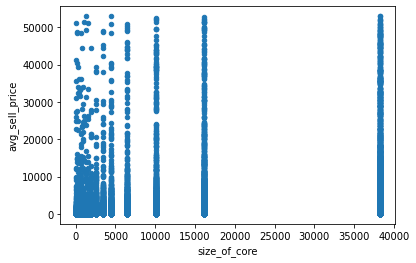

In [167]:
kcore_pr_sell[(np.abs(stats.zscore(kcore_pr_sell)) < 3).all(axis=1)].plot.scatter(x="size_of_core", y="avg_sell_price")

<AxesSubplot:xlabel='size_of_core', ylabel='pagerank'>

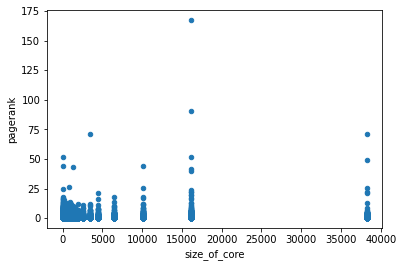

In [168]:
kcore_pr_sell.plot.scatter(x="size_of_core", y="pagerank")

<AxesSubplot:xlabel='size_of_core', ylabel='pagerank'>

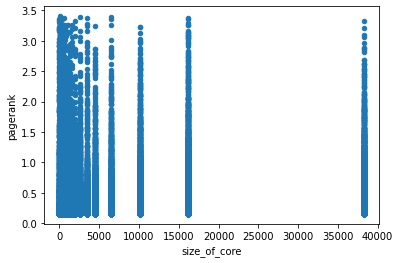

In [169]:
kcore_pr_sell[(np.abs(stats.zscore(kcore_pr_sell)) < 3).all(axis=1)].plot.scatter(x="size_of_core", y="pagerank")